<a href="https://colab.research.google.com/github/karandeep7/Image-Classification-of-Plant-Diseases-Using-CNN/blob/main/test_on_100_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Testing

###Import required libraries

In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import pandas as pd
import os
from PIL import Image
import json
from torch.utils.data import Dataset, DataLoader, Subset
from sklearn.model_selection import train_test_split
from torch import tensor
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18, ResNet18_Weights
from torchvision.models import vgg16
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

from sklearn.manifold import TSNE
import numpy as np
import gdown



###Import 100 images dataset and trained models from google drive

In [ ]:
file_id = "1GW62mSi33fJ1LY77ABs9qoFQ0I0OgUEt"  # Replace with your file ID
output = "custom_100_dataset.zip"  # Specify the desired output filename
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1GW62mSi33fJ1LY77ABs9qoFQ0I0OgUEt
To: /content/custom_100_dataset.zip
100%|██████████| 14.1M/14.1M [00:00<00:00, 17.0MB/s]


'custom_100_dataset.zip'

In [ ]:
file_id = "1uWr7eJ6XuQhvks8tvymCy_kRjaGVPBFf"  # Replace with your file ID
output = "trained_models.zip"  # Specify the desired output filename
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1uWr7eJ6XuQhvks8tvymCy_kRjaGVPBFf
From (redirected): https://drive.google.com/uc?id=1uWr7eJ6XuQhvks8tvymCy_kRjaGVPBFf&confirm=t&uuid=fa8b3e8f-19ee-47f8-8efe-76d97c9280bd
To: /content/trained_models.zip
100%|██████████| 1.74G/1.74G [00:30<00:00, 56.7MB/s]


'trained_models.zip'

###Unzip the datasets and trained models

In [ ]:
import zipfile
with zipfile.ZipFile('/content/custom_100_dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/custom_100_dataset')

with zipfile.ZipFile('/content/trained_models.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/trained_models')

#Preprocessing


###Preprocessing functions for the dataloader

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to a standard size
    transforms.ToTensor(),           # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize

])

###Create dataloader for Crop Diseases Classification Dataset

In [ ]:
test_dir_2 = '/content/custom_100_dataset/CDC_sample'
test_dataset_2 = ImageFolder(root=test_dir_2, transform=transform)
batch_size = 32
test_loader_2 = DataLoader(test_dataset_2, batch_size=batch_size, shuffle=True)
with open("/content/trained_models/class_labels_1.json", "r") as file:
    class_labels_1 = json.load(file)

###Create a dataloader for Potato disease leaf dataset

In [ ]:
test_dir_1 = '/content/custom_100_dataset/PLD_sample'
test_dataset_1 = ImageFolder(root=test_dir_1, transform=transform)
batch_size = 32
test_loader_1 = DataLoader(test_dataset_1, batch_size=batch_size, shuffle=True)
with open("/content/trained_models/class_labels_2.json", "r") as file:
    class_labels_2 = json.load(file)

###Create a dataloader for Plant Village Dataset

In [ ]:
test_dir_3 = '/content/custom_100_dataset/PVD_sample'
test_dataset_3 = ImageFolder(root=test_dir_3, transform=transform)
batch_size = 32
test_loader_3 = DataLoader(test_dataset_3, batch_size=batch_size, shuffle=True)
with open("/content/trained_models/class_labels_3.json", "r") as file:
    class_labels_3 = json.load(file)

#Convolutional Neural Networks

In [ ]:
# # Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

###Define Resnet-18 Model

In [ ]:
def get_resnet_model(classes):
    # Initialize the ResNet-18 model
    model = resnet18(num_classes=len(classes)).to(device)  # Change to the correct number of classes
    return model

###Define vgg-16 Model

In [ ]:
def get_vgg16_model(classes):
    # Initialize the VGG-16 model
    model = vgg16(num_classes=len(classes)).to(device)  # Set pretrained=True if you want to use pre-trained weights
    return model

###Define MobileNet Model


In [ ]:
def get_mobilenet_model(classes):
    # Initialize the MobileNet v2 model
    model = mobilenet_v2(num_classes=len(classes)).to(device)  # Change to the correct number of classes
    return model

###Define function to reload the models

In [ ]:
# Function to load the model
def load_model(model, path):
    # Load the model's state_dict from the file
    model.load_state_dict(torch.load(path, map_location=device))
    model.eval()  # Set the model to evaluation mode
    print(f"Model loaded from {path}")
    return model

#Testing

##Re-loading the saved models

In [ ]:
resnet_model_1 = get_resnet_model(classes=class_labels_1)  # Initialize the model again (same as the one saved)
resnet_model_1 = load_model(resnet_model_1, "trained_models/resnet_model_1.pth")

resnet_model_2 = get_resnet_model(classes=class_labels_2)
resnet_model_2 = load_model(resnet_model_2, "trained_models/resnet_model_2.pth")

resnet_model_3 = get_resnet_model(classes=class_labels_3)
resnet_model_3 = load_model(resnet_model_3, "trained_models/resnet_model_3.pth")

vgg_model_1 = get_vgg16_model(classes=class_labels_1)
vgg_model_1 = load_model(vgg_model_1, "trained_models/vgg_model_1.pth")

vgg_model_2 = get_vgg16_model(classes=class_labels_2)
vgg_model_2 = load_model(vgg_model_2, "trained_models/vgg_model_2.pth")

vgg_model_3 = get_vgg16_model(classes=class_labels_3)
vgg_model_3 = load_model(vgg_model_3, "trained_models/vgg_model_3.pth")

mobilenet_model_1 = get_mobilenet_model(classes=class_labels_1)
mobilenet_model_1 = load_model(mobilenet_model_1, "trained_models/mobilenet_model_1.pth")

mobilenet_model_2 = get_mobilenet_model(classes=class_labels_2)
mobilenet_model_2 = load_model(mobilenet_model_2, "trained_models/mobilenet_model_2.pth")

mobilenet_model_3 = get_mobilenet_model(classes=class_labels_3)
mobilenet_model_3 = load_model(mobilenet_model_3, "trained_models/mobilenet_model_3.pth")

resnet_transfer_model_3 = get_resnet_model(classes=class_labels_3)
resnet_transfer_model_3 = load_model(resnet_transfer_model_3, "trained_models/resnet_transfer_model_3.pth")

mobilenet_transfer_model_2 = get_mobilenet_model(classes=class_labels_2)
mobilenet_transfer_model_2 = load_model(mobilenet_transfer_model_2, "trained_models/mobilenet_transfer_model_2.pth")

resnet_model_1_HT_batch_8_lr_01 = get_resnet_model(classes=class_labels_1)
resnet_model_1_HT_batch_8_lr_01 = load_model(resnet_model_1_HT_batch_8_lr_01, "trained_models/resnet_model_HT_batch_8_lr_0.01.pth")

models = [resnet_model_1, resnet_model_2, resnet_model_3, mobilenet_model_1, mobilenet_model_2, mobilenet_model_3, vgg_model_1, vgg_model_2, vgg_model_3, resnet_transfer_model_3, mobilenet_transfer_model_2, resnet_model_1_HT_batch_8_lr_01]

<ipython-input-13-ed0b2097167f>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path, map_location=device))


Model loaded from trained_models/resnet_model_1.pth
Model loaded from trained_models/resnet_model_2.pth
Model loaded from trained_models/resnet_model_3.pth
Model loaded from trained_models/vgg_model_1.pth
Model loaded from trained_models/vgg_model_2.pth
Model loaded from trained_models/vgg_model_3.pth
Model loaded from trained_models/mobilenet_model_1.pth
Model loaded from trained_models/mobilenet_model_2.pth
Model loaded from trained_models/mobilenet_model_3.pth
Model loaded from trained_models/resnet_transfer_model_3.pth
Model loaded from trained_models/mobilenet_transfer_model_2.pth
Model loaded from trained_models/resnet_model_HT_batch_8_lr_0.01.pth


##Defining the function to test models

In [ ]:
def evaluate_model(model, test_loader, class_names):
    """
    Evaluates the model on the test dataset and computes metrics.
    """
    model.eval()  # Set the model to evaluation mode
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    # Compute metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Generate classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


###Evaluating all the trained models on test datasets

Evaluating Resnet-18 on Potato Disease Leaf Dataset
Accuracy: 0.9500
Precision: 0.9527
Recall: 0.9500
F1-Score: 0.9494

Classification Report:
              precision    recall  f1-score   support

Early_Blight       0.94      1.00      0.97        33
     Healthy       1.00      0.87      0.93        30
 Late_Blight       0.92      0.97      0.95        37

    accuracy                           0.95       100
   macro avg       0.96      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



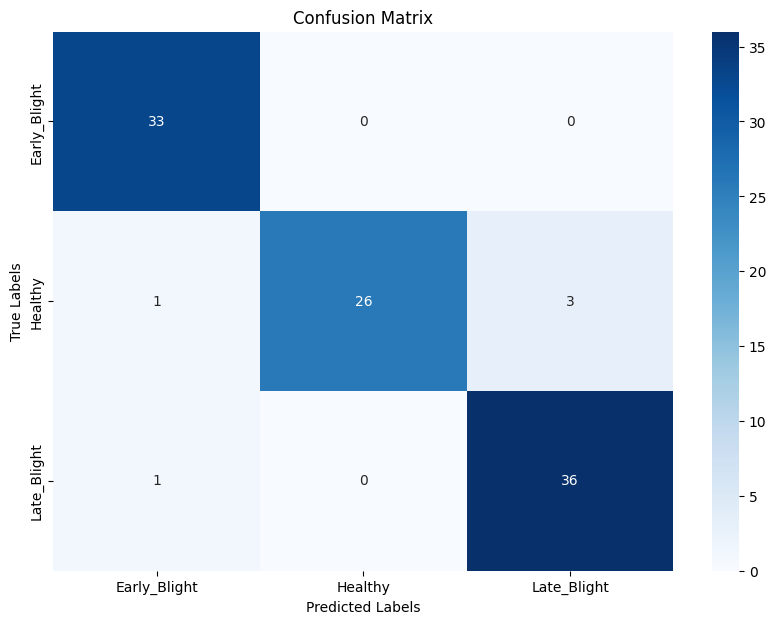


Evaluating Resnet-18 on Crop Diseases Classification Dataset
Accuracy: 0.6100
Precision: 0.6209
Recall: 0.6100
F1-Score: 0.5896

Classification Report:
                                     precision    recall  f1-score   support

     Cassava Bacterial Blight (CBB)       0.75      0.30      0.43        20
Cassava Brown Streak Disease (CBSD)       0.46      0.55      0.50        20
         Cassava Green Mottle (CGM)       0.64      0.90      0.75        20
       Cassava Mosaic Disease (CMD)       0.78      0.90      0.84        20
                            Healthy       0.47      0.40      0.43        20

                           accuracy                           0.61       100
                          macro avg       0.62      0.61      0.59       100
                       weighted avg       0.62      0.61      0.59       100



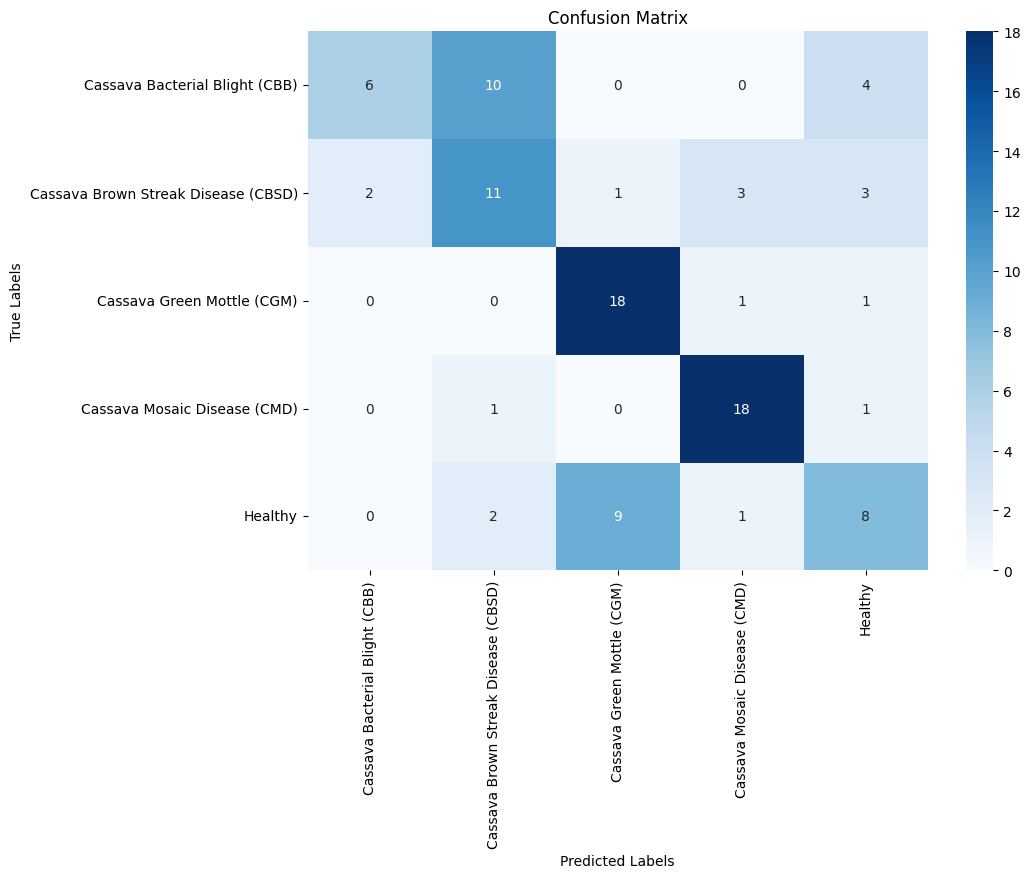


Evaluating Resnet-18 on Plant Village Dataset
Accuracy: 0.9808
Precision: 0.9832
Recall: 0.9808
F1-Score: 0.9807

Classification Report:
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       1.00      1.00      1.00         6
                     Pepper__bell___healthy       1.00      1.00      1.00         7
                      Potato___Early_blight       1.00      1.00      1.00         7
                       Potato___Late_blight       1.00      1.00      1.00         7
                           Potato___healthy       1.00      1.00      1.00         7
                      Tomato_Bacterial_spot       1.00      0.86      0.92         7
                        Tomato_Early_blight       0.88      1.00      0.93         7
                         Tomato_Late_blight       1.00      1.00      1.00         7
                           Tomato_Leaf_Mold       1.00      1.00      1.00         7
           

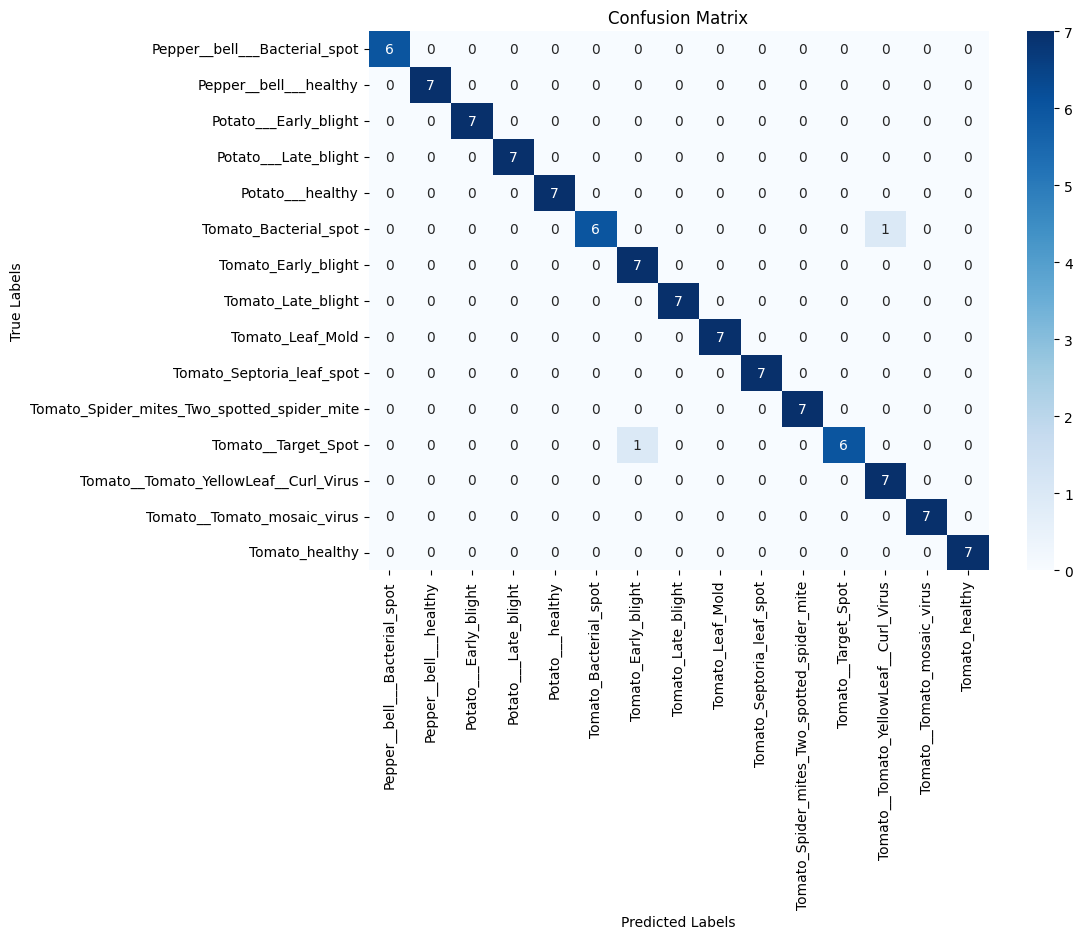


Evaluating VGG-16 on Potato Disease Leaf Dataset
Accuracy: 0.6100
Precision: 0.6322
Recall: 0.6100
F1-Score: 0.6047

Classification Report:
              precision    recall  f1-score   support

Early_Blight       0.77      0.52      0.62        33
     Healthy       0.57      0.83      0.68        30
 Late_Blight       0.56      0.51      0.54        37

    accuracy                           0.61       100
   macro avg       0.63      0.62      0.61       100
weighted avg       0.63      0.61      0.60       100



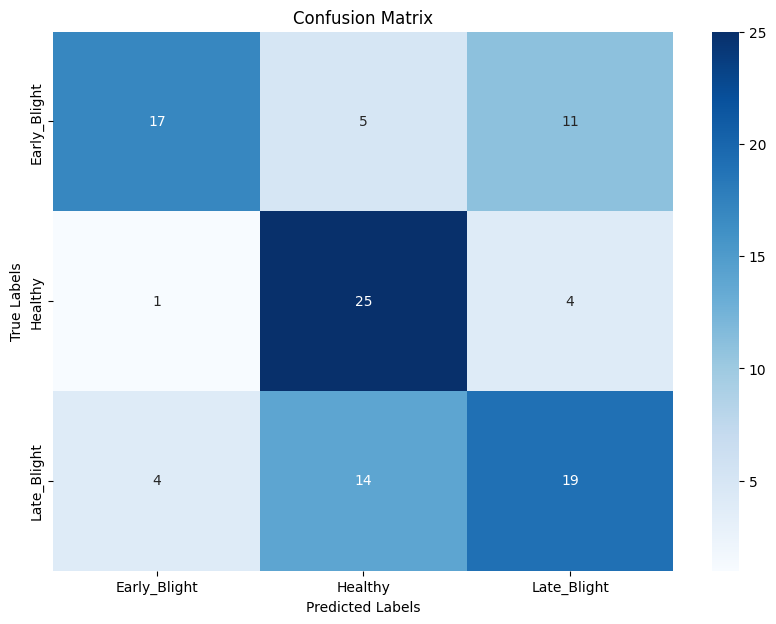


Evaluating VGG-16 on Crop Diseases Classification Dataset


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Accuracy: 0.2500
Precision: 0.2065
Recall: 0.2500
F1-Score: 0.1537

Classification Report:
                                     precision    recall  f1-score   support

     Cassava Bacterial Blight (CBB)       0.33      0.05      0.09        20
Cassava Brown Streak Disease (CBSD)       0.29      0.10      0.15        20
         Cassava Green Mottle (CGM)       0.00      0.00      0.00        20
       Cassava Mosaic Disease (CMD)       0.26      1.00      0.41        20
                            Healthy       0.15      0.10      0.12        20

                           accuracy                           0.25       100
                          macro avg       0.21      0.25      0.15       100
                       weighted avg       0.21      0.25      0.15       100



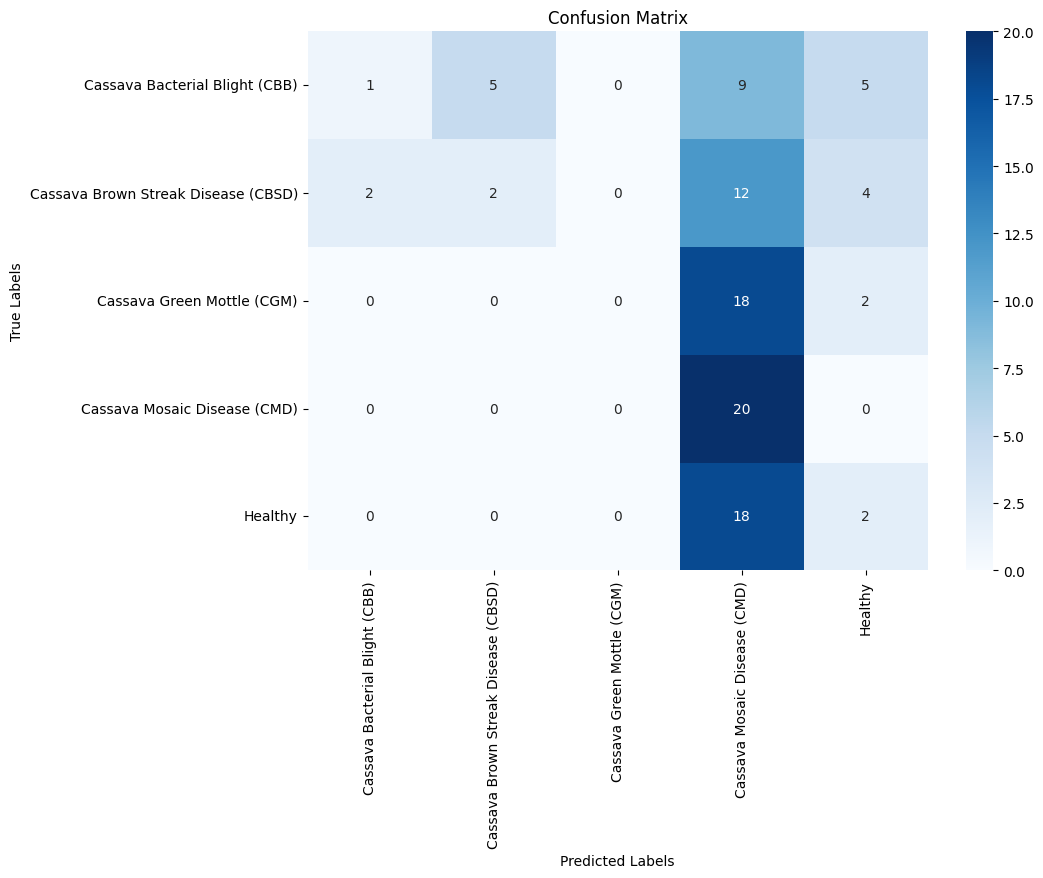


Evaluating VGG-16 on Plant Village Dataset
Accuracy: 0.8462
Precision: 0.8924
Recall: 0.8462
F1-Score: 0.8457

Classification Report:
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       1.00      0.67      0.80         6
                     Pepper__bell___healthy       0.86      0.86      0.86         7
                      Potato___Early_blight       1.00      0.86      0.92         7
                       Potato___Late_blight       0.70      1.00      0.82         7
                           Potato___healthy       1.00      0.57      0.73         7
                      Tomato_Bacterial_spot       0.64      1.00      0.78         7
                        Tomato_Early_blight       1.00      0.57      0.73         7
                         Tomato_Late_blight       1.00      1.00      1.00         7
                           Tomato_Leaf_Mold       1.00      0.57      0.73         7
              

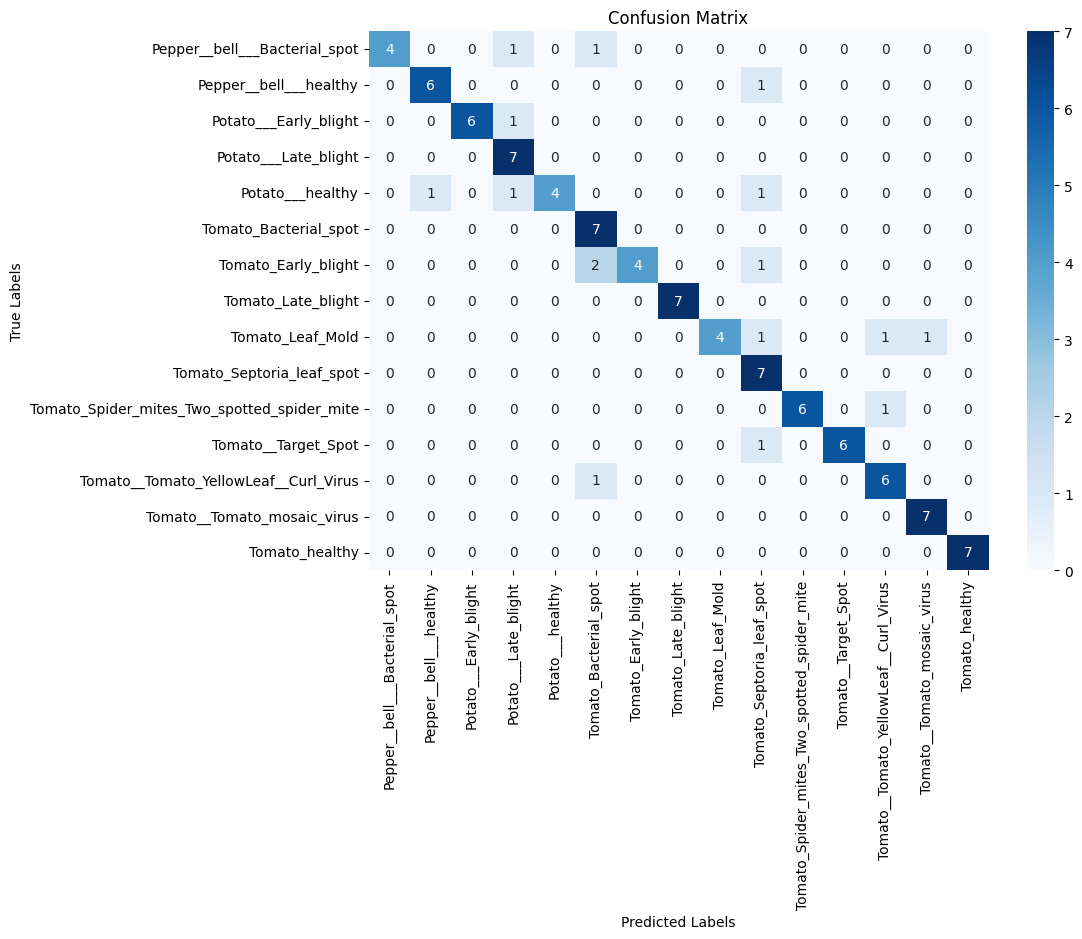


Evaluating MobileNet on Potato Disease Leaf Dataset
Accuracy: 0.9400
Precision: 0.9454
Recall: 0.9400
F1-Score: 0.9400

Classification Report:
              precision    recall  f1-score   support

Early_Blight       0.87      1.00      0.93        33
     Healthy       1.00      0.97      0.98        30
 Late_Blight       0.97      0.86      0.91        37

    accuracy                           0.94       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.95      0.94      0.94       100



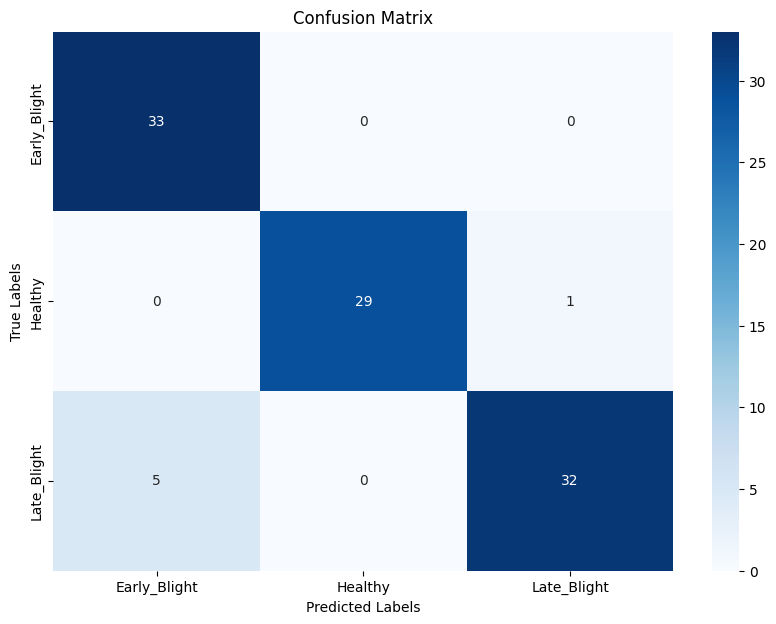


Evaluating MobileNet on Crop Diseases Classification Dataset
Accuracy: 0.4400
Precision: 0.5684
Recall: 0.4400
F1-Score: 0.3919

Classification Report:
                                     precision    recall  f1-score   support

     Cassava Bacterial Blight (CBB)       0.67      0.20      0.31        20
Cassava Brown Streak Disease (CBSD)       0.57      0.20      0.30        20
         Cassava Green Mottle (CGM)       0.75      0.15      0.25        20
       Cassava Mosaic Disease (CMD)       0.53      0.80      0.64        20
                            Healthy       0.32      0.85      0.47        20

                           accuracy                           0.44       100
                          macro avg       0.57      0.44      0.39       100
                       weighted avg       0.57      0.44      0.39       100



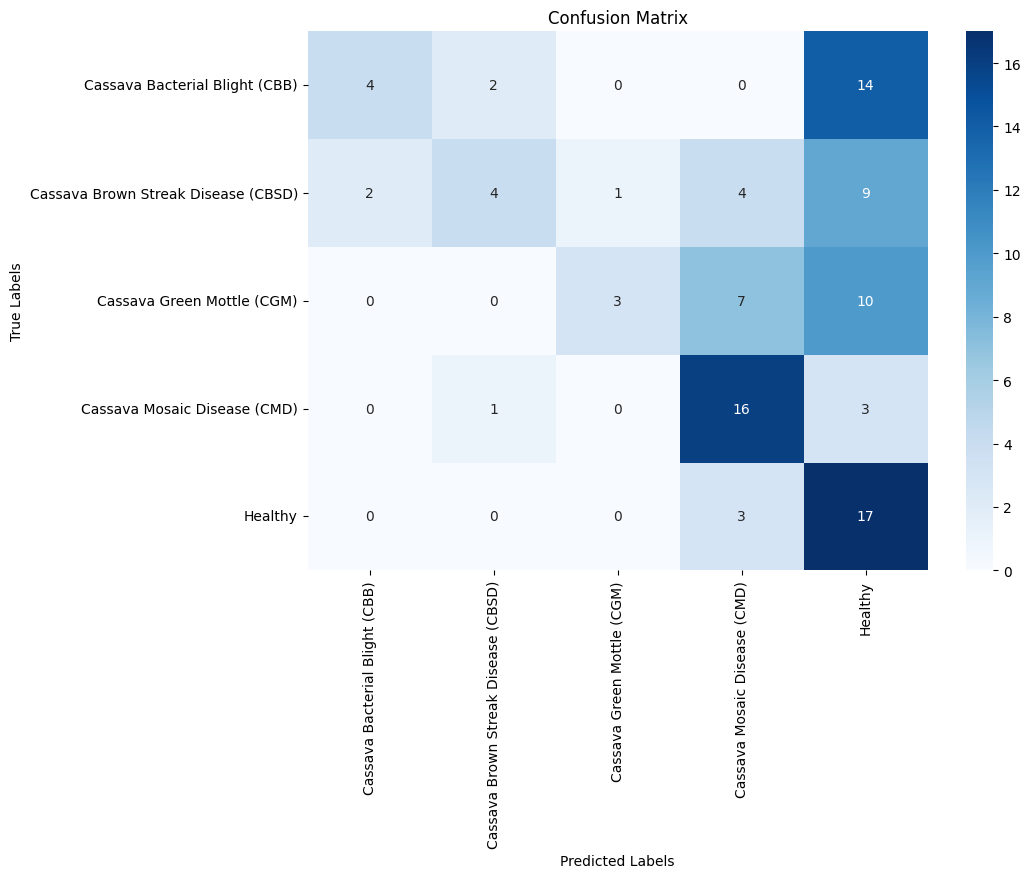


Evaluating MobileNet on Plant Village Dataset
Accuracy: 0.9904
Precision: 0.9916
Recall: 0.9904
F1-Score: 0.9903

Classification Report:
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       1.00      1.00      1.00         6
                     Pepper__bell___healthy       0.88      1.00      0.93         7
                      Potato___Early_blight       1.00      1.00      1.00         7
                       Potato___Late_blight       1.00      1.00      1.00         7
                           Potato___healthy       1.00      0.86      0.92         7
                      Tomato_Bacterial_spot       1.00      1.00      1.00         7
                        Tomato_Early_blight       1.00      1.00      1.00         7
                         Tomato_Late_blight       1.00      1.00      1.00         7
                           Tomato_Leaf_Mold       1.00      1.00      1.00         7
           

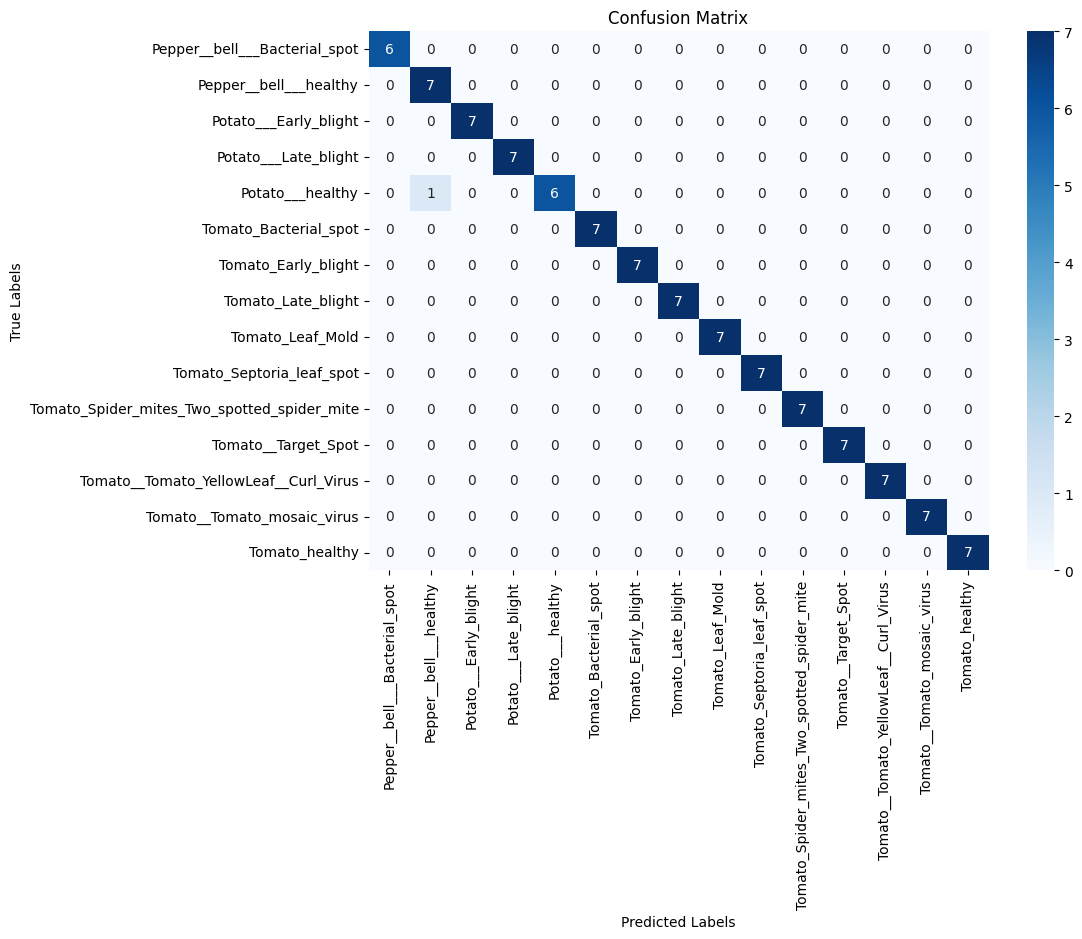


Evaluating Resnet-18 using transfer learning on Plant Village Dataset
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Classification Report:
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       1.00      1.00      1.00         6
                     Pepper__bell___healthy       1.00      1.00      1.00         7
                      Potato___Early_blight       1.00      1.00      1.00         7
                       Potato___Late_blight       1.00      1.00      1.00         7
                           Potato___healthy       1.00      1.00      1.00         7
                      Tomato_Bacterial_spot       1.00      1.00      1.00         7
                        Tomato_Early_blight       1.00      1.00      1.00         7
                         Tomato_Late_blight       1.00      1.00      1.00         7
                           Tomato_Leaf_Mold       1.00      1.00      1.

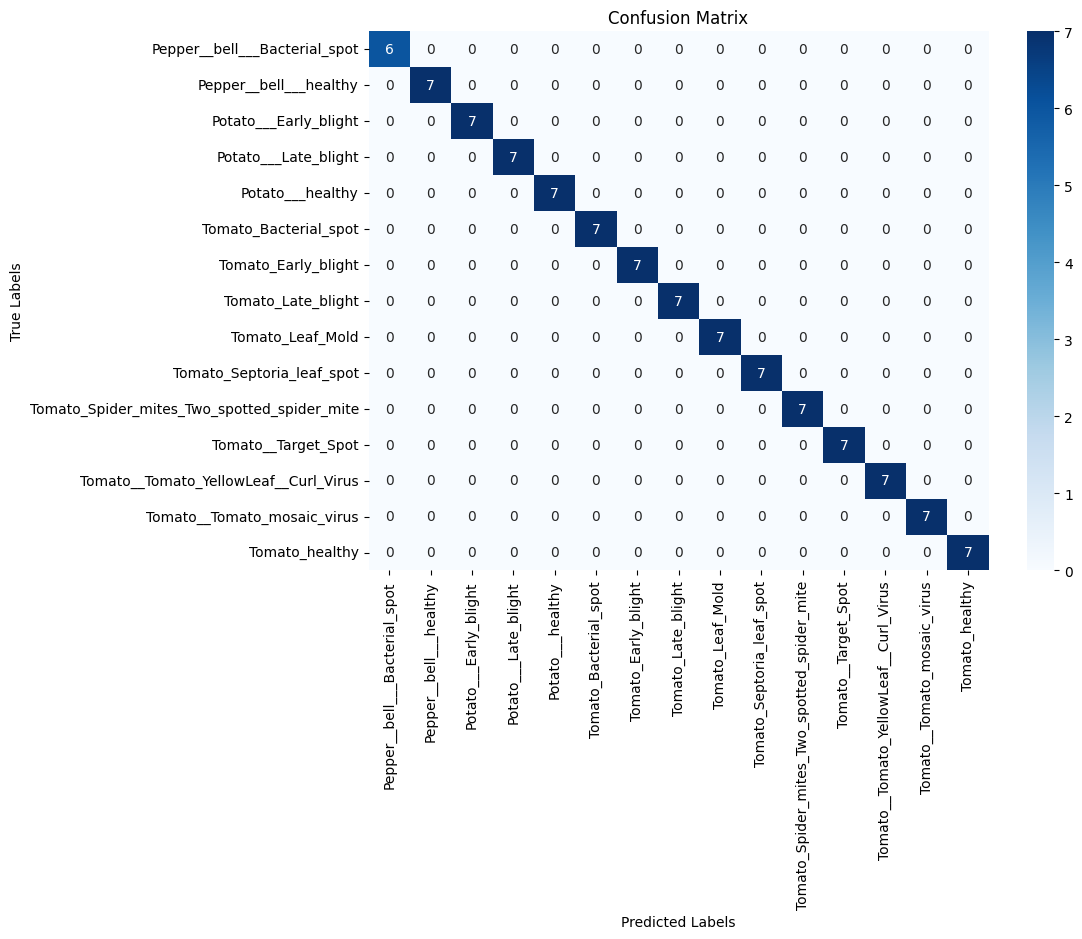


Evaluating MobileNet using transfer learning on Crop Diseases Classification Dataset
Accuracy: 0.8500
Precision: 0.8512
Recall: 0.8500
F1-Score: 0.8484

Classification Report:
                                     precision    recall  f1-score   support

     Cassava Bacterial Blight (CBB)       0.80      0.80      0.80        20
Cassava Brown Streak Disease (CBSD)       0.88      0.75      0.81        20
         Cassava Green Mottle (CGM)       0.89      0.85      0.87        20
       Cassava Mosaic Disease (CMD)       0.87      1.00      0.93        20
                            Healthy       0.81      0.85      0.83        20

                           accuracy                           0.85       100
                          macro avg       0.85      0.85      0.85       100
                       weighted avg       0.85      0.85      0.85       100



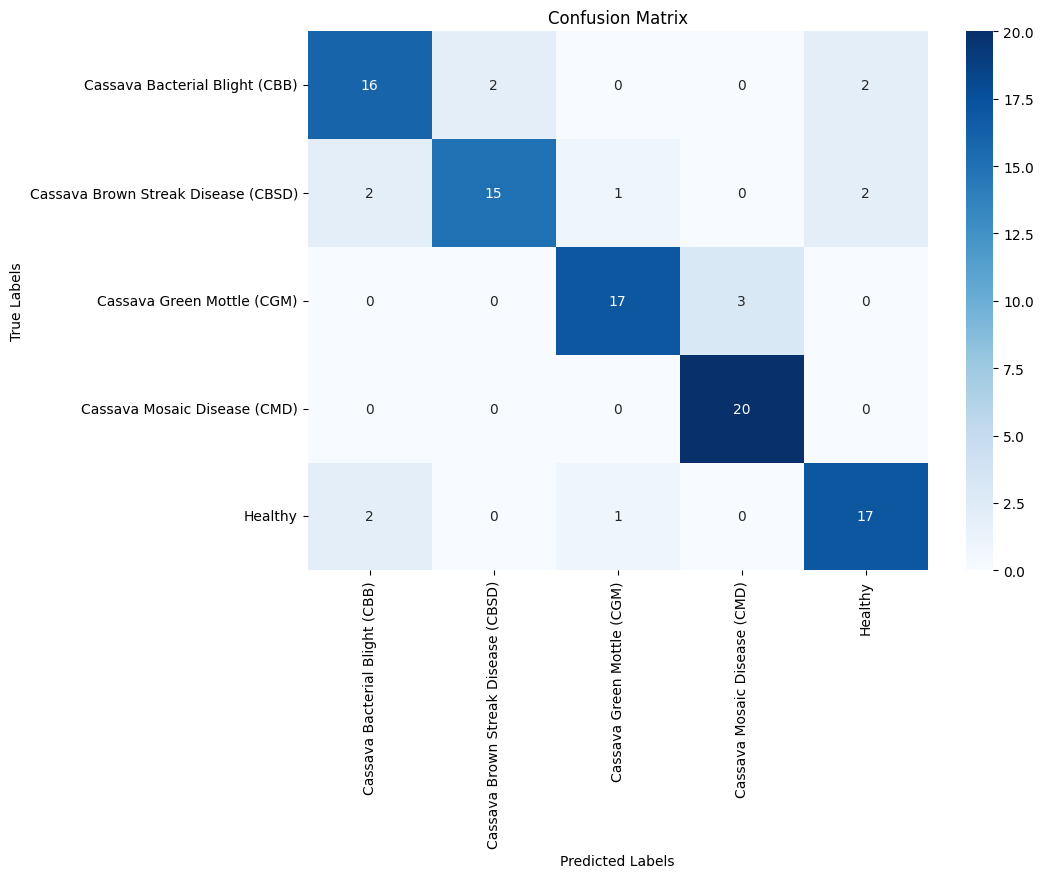


Evaluating hyperparameter tuned Resnet-18 on Plant Village Dataset with batch size 8 and learning rate 0.01
Accuracy: 0.9600
Precision: 0.9604
Recall: 0.9600
F1-Score: 0.9596

Classification Report:
              precision    recall  f1-score   support

Early_Blight       0.97      0.91      0.94        33
     Healthy       0.97      0.97      0.97        30
 Late_Blight       0.95      1.00      0.97        37

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



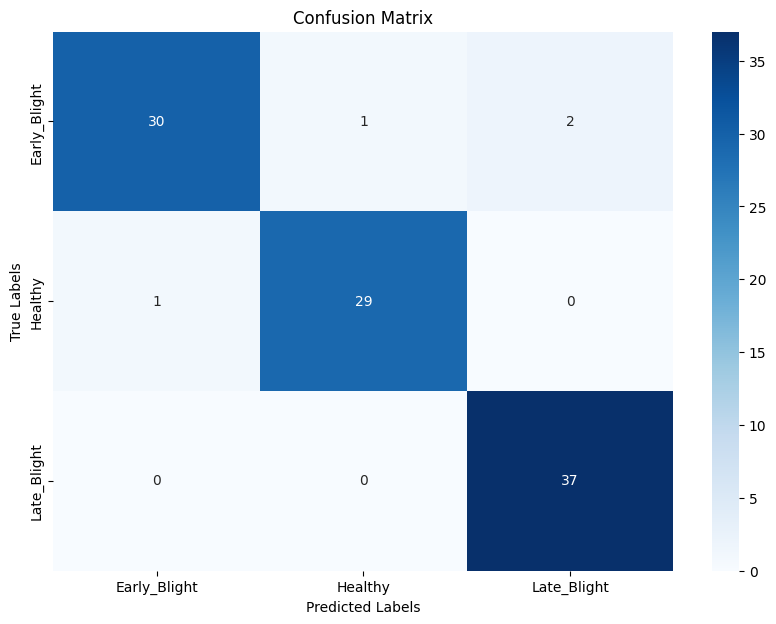

In [ ]:
print("Evaluating Resnet-18 on Potato Disease Leaf Dataset")
evaluate_model(resnet_model_1, test_loader_1, class_names=class_labels_1)

print("\nEvaluating Resnet-18 on Crop Diseases Classification Dataset")
evaluate_model(resnet_model_2, test_loader_2, class_names=class_labels_2)

print("\nEvaluating Resnet-18 on Plant Village Dataset")
evaluate_model(resnet_model_3, test_loader_3, class_names=class_labels_3)

print("\nEvaluating VGG-16 on Potato Disease Leaf Dataset")
evaluate_model(vgg_model_1, test_loader_1, class_names=class_labels_1)

print("\nEvaluating VGG-16 on Crop Diseases Classification Dataset")
evaluate_model(vgg_model_2, test_loader_2, class_names=class_labels_2)

print("\nEvaluating VGG-16 on Plant Village Dataset")
evaluate_model(vgg_model_3, test_loader_3, class_names=class_labels_3)

print("\nEvaluating MobileNet on Potato Disease Leaf Dataset")
evaluate_model(mobilenet_model_1, test_loader_1, class_names=class_labels_1)

print("\nEvaluating MobileNet on Crop Diseases Classification Dataset")
evaluate_model(mobilenet_model_2, test_loader_2, class_names=class_labels_2)

print("\nEvaluating MobileNet on Plant Village Dataset")
evaluate_model(mobilenet_model_3, test_loader_3, class_names=class_labels_3)

print("\nEvaluating Resnet-18 using transfer learning on Plant Village Dataset")
evaluate_model(resnet_transfer_model_3, test_loader_3, class_names=class_labels_3)

print("\nEvaluating MobileNet using transfer learning on Crop Diseases Classification Dataset")
evaluate_model(mobilenet_transfer_model_2, test_loader_2, class_names=class_labels_2)

print("\nEvaluating hyperparameter tuned Resnet-18 on Potato Disease Leaf Dataset with batch size 8 and learning rate 0.01")
evaluate_model(resnet_model_1_HT_batch_8_lr_01, test_loader_1, class_names=class_labels_1)


##TSNE Visualization

In [ ]:
def visualize_tsne(model, dataloader,classes, num_samples=1000, perplexity=30):
    """
    Visualizes feature embeddings using t-SNE.
    """
    model.eval()  # Set the model to evaluation mode
    features = []
    labels = []

    with torch.no_grad():
        for images, label_batch in dataloader:
            images = images.to(device)
            outputs = model(images)
            features.append(outputs.cpu().numpy())
            labels.extend(label_batch.numpy())
            if len(labels) >= num_samples:
                break

    # Stack features and labels
    features = np.vstack(features)
    labels = np.array(labels[:num_samples])

    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(features[:num_samples])

    # Plot
    plt.figure(figsize=(10, 8))
    for i, class_name in enumerate(classes):
        indices = labels == i
        plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label=class_name, alpha=0.7)
    plt.legend()
    plt.title('t-SNE Visualization of Features')
    plt.show()


Visualizing t-SNE for Resnet-18 on Plant Village Dataset


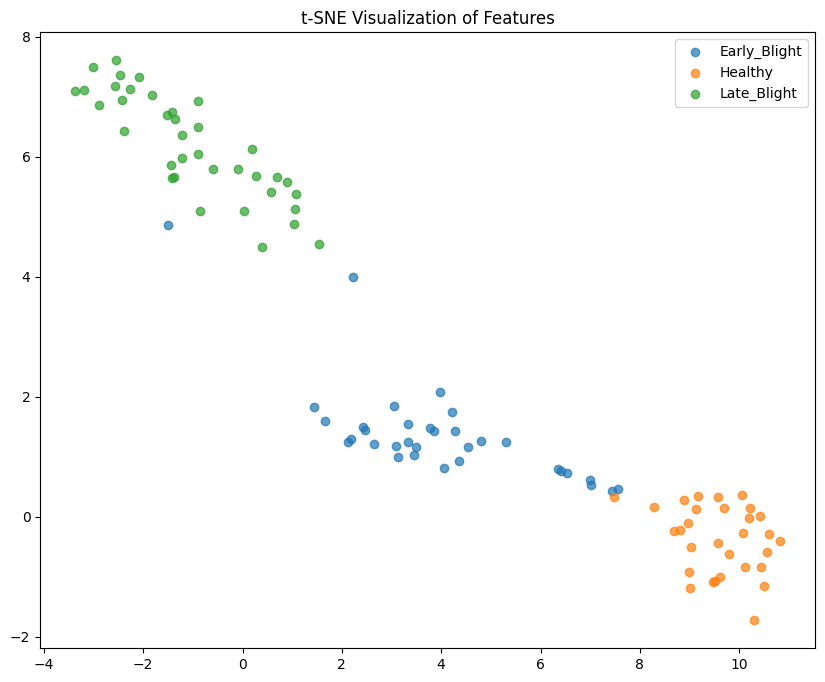

Visualizing t-SNE for VGG-16 on Potato Disease Leaf Dataset


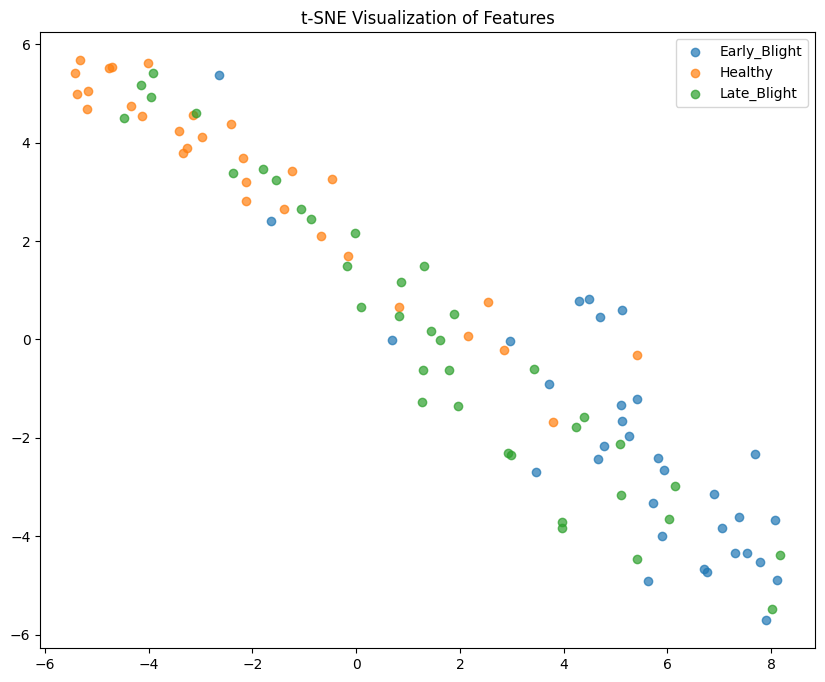

Visualizing t-SNE for Mobilenet on Plant Village Dataset


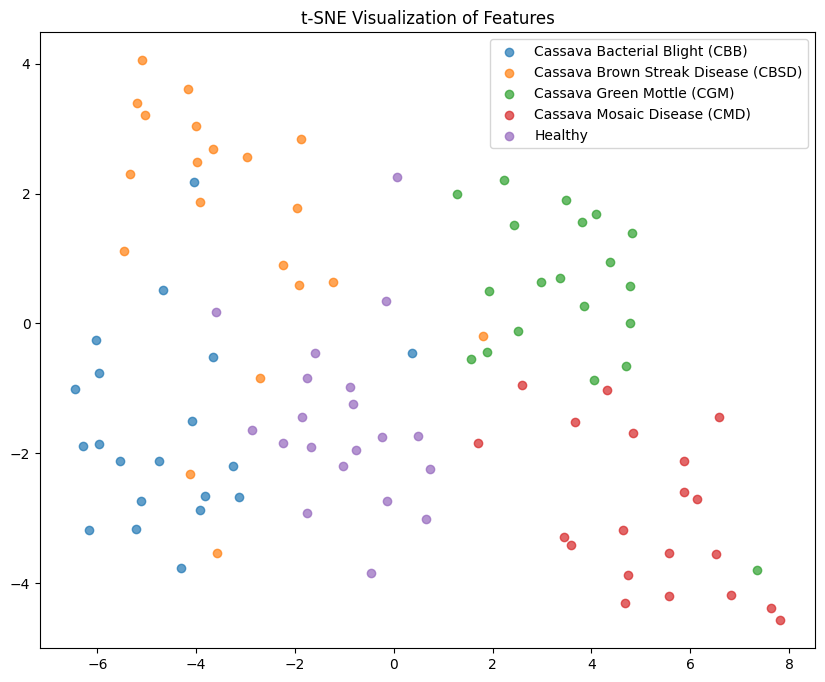

Visualizing t-SNE for Resnet using transfer learning on Plant Village Dataset


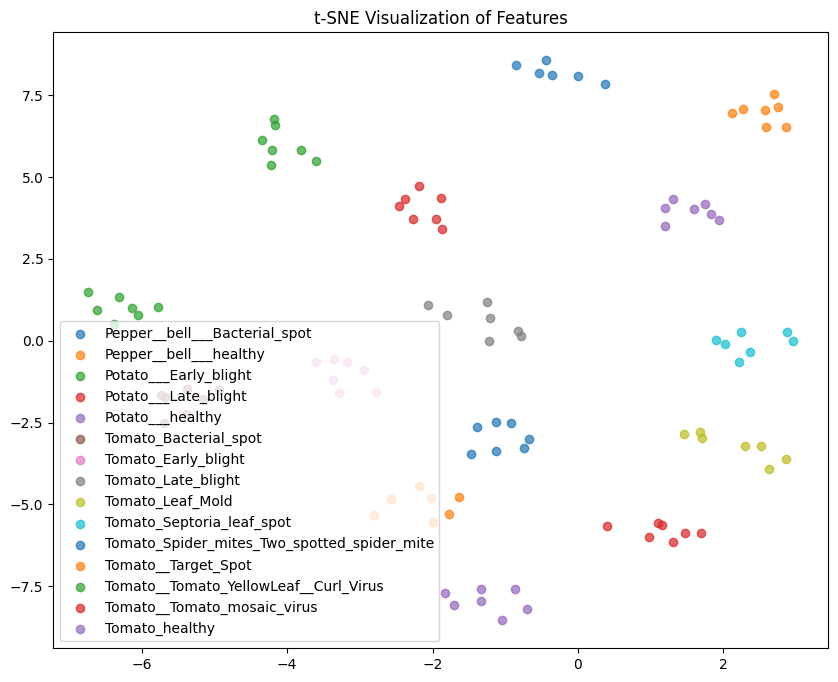

In [ ]:
print("Visualizing t-SNE for Resnet-18 on Potato Disease Leaf Dataset")
visualize_tsne(resnet_model_1_HT_batch_8_lr_01, test_loader_1, classes = class_labels_1)

print("Visualizing t-SNE for VGG-16 on Potato Disease Leaf Dataset")
visualize_tsne(vgg_model_1, test_loader_1, classes = class_labels_1)

print("Visualizing t-SNE for Mobilenet on Crop Diseases Classification Dataset")
visualize_tsne(mobilenet_transfer_model_2, test_loader_2, classes = class_labels_2)

print("Visualizing t-SNE for Resnet using transfer learning on Plant Village Dataset")
visualize_tsne(resnet_transfer_model_3, test_loader_3, classes = class_labels_3)